## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('Listings.csv', encoding='ISO-8859-1', 
                 low_memory = False, 
                 index_col = 'listing_id')

In [3]:
df.head()

,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


# Data Cleaning and Preparation

In [4]:
df['host_since'] = pd.to_datetime(df['host_since'])

Parsing the date column to a datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279712 entries, 281420 to 40219504
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   name                         279539 non-null  object        
 1   host_id                      279712 non-null  int64         
 2   host_since                   279547 non-null  datetime64[ns]
 3   host_location                278872 non-null  object        
 4   host_response_time           150930 non-null  object        
 5   host_response_rate           150930 non-null  float64       
 6   host_acceptance_rate         166625 non-null  float64       
 7   host_is_superhost            279547 non-null  object        
 8   host_total_listings_count    279547 non-null  float64       
 9   host_has_profile_pic         279547 non-null  object        
 10  host_identity_verified       279547 non-null  object        
 11  neighbourhood      

In [6]:
df['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

The focus was on Paris, but it was necessary to see what other Cities where in the dataset

### Applying a Filter and removing unwanted columns

In [7]:
columns_to_keep = ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']
df_paris1 = df[columns_to_keep]
#df_paris = df[df['city'] == 'Paris']

In [8]:
df_paris = df_paris1[df['city'] == 'Paris']

In [9]:
df_paris.head()

,host_since,neighbourhood,city,accommodates,price
listing_id,,,,,
281420,2011-12-03,Buttes-Montmartre,Paris,2,53
3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
4082273,2014-07-31,Elysee,Paris,2,89
4797344,2013-12-17,Vaugirard,Paris,2,58
4823489,2014-12-14,Passy,Paris,2,60


In [10]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 281420 to 40219504
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


### Data Description

In [11]:
df_paris.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [12]:
df_paris.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


## Data Visualization

In [13]:
paris_listings_neighbourhood = (df_paris
                                .groupby('neighbourhood')
                                .agg({'price' : 'mean'})
                                .sort_values(by='price'))

In [14]:
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [15]:
paris_listings_accomodations = (df_paris[df_paris['neighbourhood'] == 'Elysee']
                                .groupby('accommodates')
                                .agg({'price' : 'mean'})
                                .sort_values('price')
                               )

In [16]:
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [17]:
paris_listings_over_time = (df_paris
                            .set_index('host_since')
                            .resample('Y')
                            .agg({
                                'neighbourhood': 'count',
                                'price' : 'mean'
                            })
                           )

In [18]:
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Bar Chart

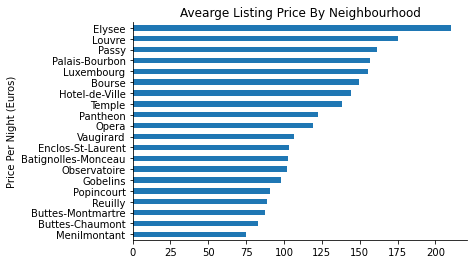

In [19]:
(paris_listings_neighbourhood
.plot
.barh(
    title = 'Avearge Listing Price By Neighbourhood',
    xlabel = 'Price Per Night (Euros)',
    ylabel = 'Neighbourhood',
    legend = None
    
)
);

sns.despine()

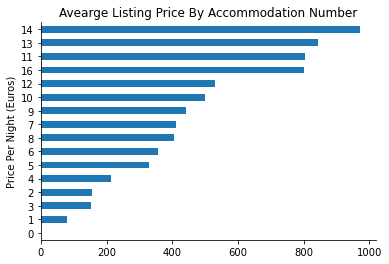

In [20]:
(paris_listings_accomodations
.plot
.barh(
    title = 'Avearge Listing Price By Accommodation Number',
    xlabel = 'Price Per Night (Euros)',
    ylabel = 'Accomodation Capacity',
    legend = None
    
)
);

sns.despine()

## Line Chart 

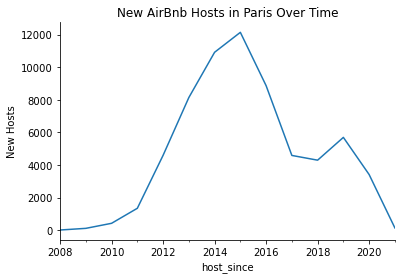

In [21]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel='New Hosts',
    title = 'New AirBnb Hosts in Paris Over Time'

)

sns.despine()

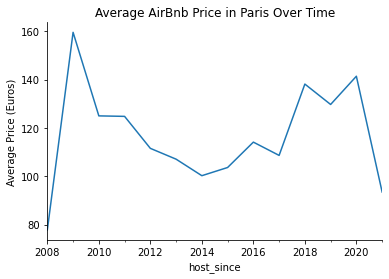

In [22]:
paris_listings_over_time['price'].plot(
    ylabel='Average Price (Euros)',
    title = 'Average AirBnb Price in Paris Over Time'

)

sns.despine()

## Dual Axis Line Chart

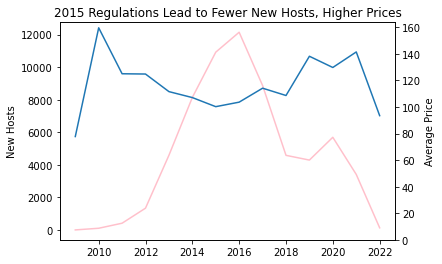

In [23]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = 'New Hosts',
    c='pink'
)

ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = 'Average Price' 
)
ax2.set_ylim(0)

ax2.set_ylabel('Average Price')

ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices');